The dataset that I am working with called Vehicles is scraped from Craigslist by Austin Reese. It is information about used cars that are being sold on Craigslist. This dataset includes variables such as the date of the vehicle listing, price, region, year, model, make, and many more. There are 426,880 rows and 27 variables. I am looking to explore the relationship between paint color and price, as well as the relationship between time and the price of a used vehicle. I also intend to visualize the car manufactuers that are sold as used cars the most often.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
vehicles = pd.read_csv('vehicles.csv', on_bad_lines='skip', engine='python')

In [ ]:
vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9044 entries, 31 to 16830
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9044 non-null   int64  
 1   url           9044 non-null   object 
 2   region        9044 non-null   object 
 3   region_url    9044 non-null   object 
 4   price         9044 non-null   int64  
 5   year          9044 non-null   float64
 6   manufacturer  9044 non-null   object 
 7   model         8977 non-null   object 
 8   fuel          9044 non-null   object 
 9   odometer      9044 non-null   float64
 10  title_status  8945 non-null   object 
 11  transmission  9044 non-null   object 
 12  drive         9044 non-null   object 
 13  type          9044 non-null   object 
 14  paint_color   9044 non-null   object 
 15  image_url     9044 non-null   object 
 16  description   9043 non-null   object 
 17  state         9044 non-null   object 
 18  lat           9012 non-null   f

In [ ]:
vehicles.describe()

,id,price,year,odometer,lat,long
count,9.044000e+03,9044.000000,9044.000000,9.044000e+03,9012.000000,9012.000000
mean,7.311662e+09,20967.077289,2012.070986,1.102043e+05,40.954830,-114.826048
std,4.363713e+06,15005.788356,9.076611,4.722047e+05,12.640426,23.613947
min,7.301600e+09,0.000000,1924.000000,0.000000e+00,-81.838232,-158.599600
25%,7.308183e+09,9950.000000,2010.000000,3.193225e+04,32.466641,-147.712930
50%,7.312585e+09,18590.000000,2014.000000,7.235100e+04,33.684238,-111.800000
75%,7.315575e+09,29590.000000,2017.000000,1.216992e+05,61.133360,-88.105874
max,7.316896e+09,239995.000000,2021.000000,9.999999e+06,64.948300,-54.052734


In [ ]:
vehicles.isnull().sum().sort_values(ascending=False)

,0
county,16831
size,12315
condition,7052
cylinders,5860
VIN,5748
drive,4840
paint_color,3980
type,3118
manufacturer,761
title_status,324


In [ ]:
vehicles = vehicles.drop(columns=['county', 'size','condition','cylinders','VIN'])

In [ ]:
vehicles = vehicles.dropna(subset=['year', 'odometer', 'fuel', 'transmission', 'paint_color', 'drive', 'type', 'manufacturer'])

In [ ]:
paint_palette = {
    'black': 'black',
    'white': 'white',
    'silver': 'silver',
    'grey': 'grey',
    'red': 'red',
    'blue': 'blue',
    'brown': 'saddlebrown',
    'yellow': 'gold',
    'green': 'green',
    'orange': 'orange',
    'custom': 'darkslategray',
    'purple': 'purple'
}

<ipython-input-24-af590467172a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=vehicles, x='paint_color', y='price', palette=paint_palette)


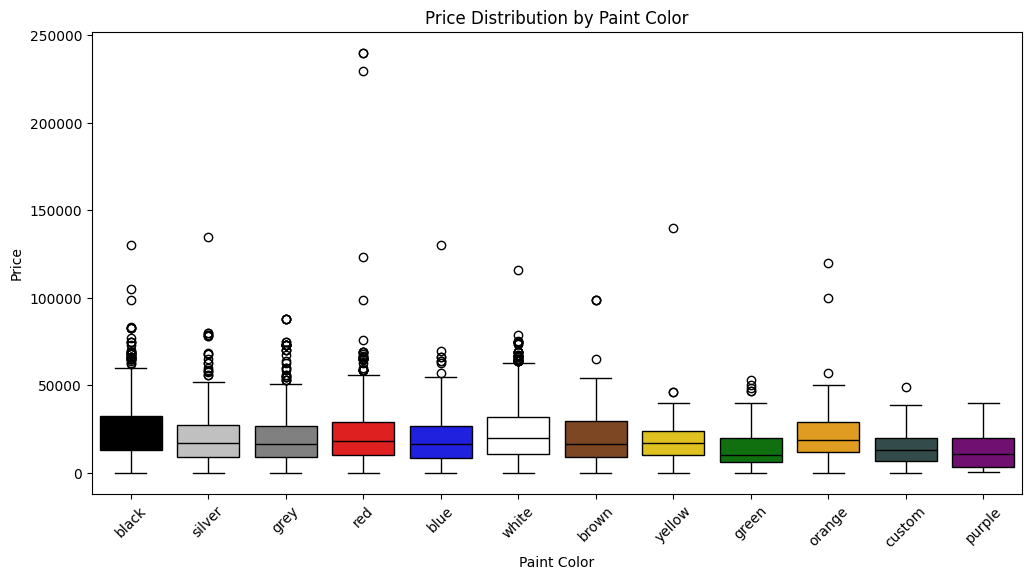

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=vehicles, x='paint_color', y='price', palette=paint_palette)
plt.title('Price Distribution by Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Price vs. Vehicle Year')

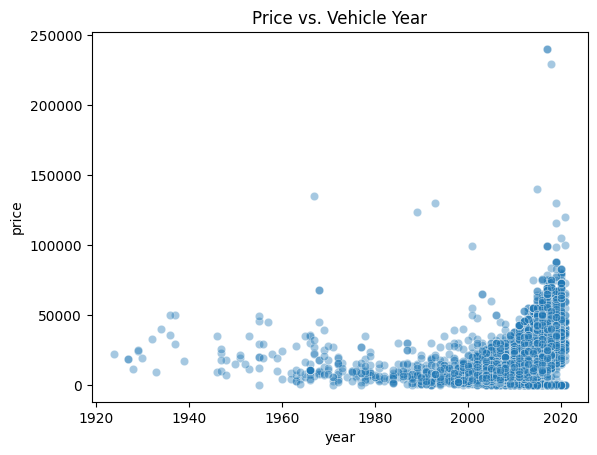

In [ ]:
sns.scatterplot(data=vehicles, x='year', y='price', alpha=0.4)
plt.title('Price vs. Vehicle Year')

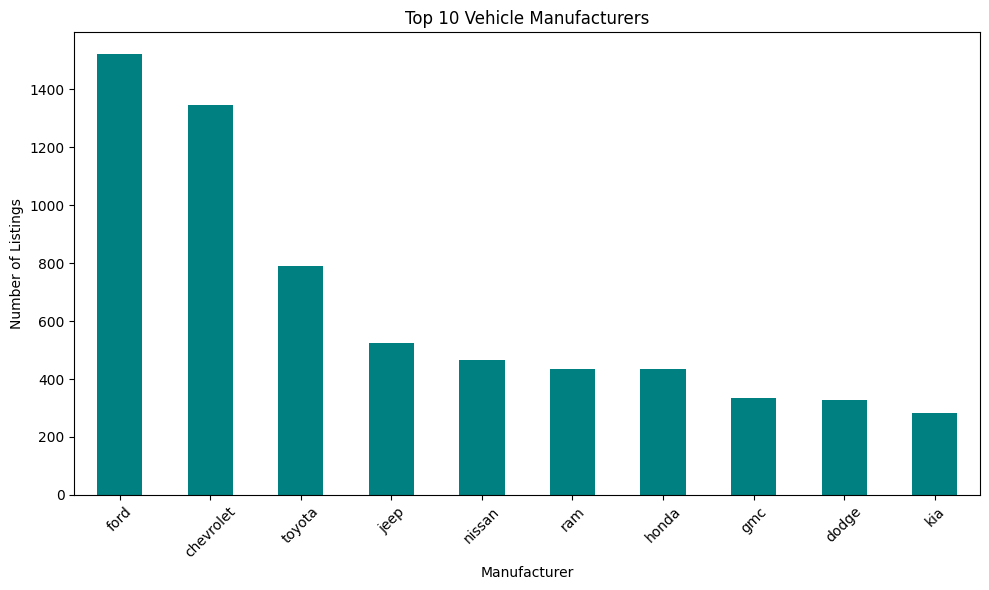

In [ ]:
top_manufacturers = vehicles['manufacturer'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_manufacturers.plot(kind='bar', color='teal')
plt.title('Top 10 Vehicle Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
vehicles = vehicles[vehicles['fuel'].notna()]
y = vehicles['fuel']

features = ['year', 'odometer', 'manufacturer', 'paint_color', 'drive', 'type', 'transmission']
X = pd.get_dummies(vehicles[features], drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8602119529954582


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

      diesel       0.42      0.05      0.08      2540
    electric       0.00      0.00      0.00       195
         gas       0.87      0.99      0.92     35932
      hybrid       0.00      0.00      0.00       578
       other       0.35      0.05      0.09      2368

    accuracy                           0.86     41613
   macro avg       0.33      0.22      0.22     41613
weighted avg       0.79      0.86      0.81     41613


Confusion Matrix:
 [[  117     0  2411     0    12]
 [    0     0   193     0     2]
 [  162     0 35554     0   216]
 [    0     0   578     0     0]
 [    0     0  2243     0   125]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


I have trained a multi-class logistic regression model to predict the fuel type of a vehicle based on multiple different kinds. There was gas, diesel, electric, hybrid and other. Instead of OvA which was not working for my dataset due to how large it is, I used multinomial logistic regression instead. I prefered this method to one versus all because it was more efficient due to the fact that there was one variable significantly more dominant than the others, which would be gas.
My model had an accuracy of 86 percent and a weighted average of F1-score of 81% which suggests that my model is relatively effective. The model performed well on gas and badly on other fuel types. It unfortunately became biased towards gas because of how dominant it was.